In [46]:
import pandas as pd
import numpy as np
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#read the file
df = pd.read_csv("/Users/mac/Desktop/OrderPredictions/dfp_100017_file.csv")

#print the head
df.head()

,LKP_ARTIKEL,FACTUUR_DATUM,NETTO_GEWICHT_KG
0,100017,2018-01-12,114.0
1,100017,2018-03-12,24.0
2,100017,2018-04-12,12.0
3,100017,2018-05-12,36.0
4,100017,2018-06-12,528.0


In [47]:
df = df[['FACTUUR_DATUM','NETTO_GEWICHT_KG']]
df.head()

,FACTUUR_DATUM,NETTO_GEWICHT_KG
0,2018-01-12,114.0
1,2018-03-12,24.0
2,2018-04-12,12.0
3,2018-05-12,36.0
4,2018-06-12,528.0


In [48]:
df.dtypes

FACTUUR_DATUM        object
NETTO_GEWICHT_KG    float64
dtype: object

In [49]:
df['FACTUUR_DATUM'] = pd.to_datetime(df.FACTUUR_DATUM,format='%Y-%m-%d')

In [50]:
df.dtypes

FACTUUR_DATUM       datetime64[ns]
NETTO_GEWICHT_KG           float64
dtype: object

In [51]:
df.index = df['FACTUUR_DATUM'] 
df.head()

,FACTUUR_DATUM,NETTO_GEWICHT_KG
FACTUUR_DATUM,,
2018-01-12,2018-01-12,114.0
2018-03-12,2018-03-12,24.0
2018-04-12,2018-04-12,12.0
2018-05-12,2018-05-12,36.0
2018-06-12,2018-06-12,528.0


In [52]:
df = df.resample('M').sum()
df

,NETTO_GEWICHT_KG
FACTUUR_DATUM,
2018-01-31,114.0
2018-02-28,0.0
2018-03-31,24.0
2018-04-30,12.0
2018-05-31,36.0
2018-06-30,528.0
2018-07-31,12.0
2018-08-31,48.0
2018-09-30,0.0


In [53]:
df = df.reset_index(level=['FACTUUR_DATUM'])
df

,FACTUUR_DATUM,NETTO_GEWICHT_KG
0,2018-01-31,114.0
1,2018-02-28,0.0
2,2018-03-31,24.0
3,2018-04-30,12.0
4,2018-05-31,36.0
5,2018-06-30,528.0
6,2018-07-31,12.0
7,2018-08-31,48.0
8,2018-09-30,0.0
9,2018-10-31,12.0


In [54]:
df.to_csv('/Users/mac/Desktop/OrderPredictions/dfp_100017_monthly.csv', index=False)

In [55]:
from pandas import read_csv
series = read_csv('/Users/mac/Desktop/OrderPredictions/dfp_100017_monthly.csv', header=0, index_col=0)
split_point = len(series) - 4
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('/Users/mac/Desktop/OrderPredictions/dataset.csv', index=False)
validation.to_csv('/Users/mac/Desktop/OrderPredictions/validation.csv', index=False)

Dataset 20, Validation 4


In [56]:
df.shape

(24, 2)

In [57]:
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [58]:
df.dtypes

FACTUUR_DATUM       datetime64[ns]
NETTO_GEWICHT_KG           float64
dtype: object

In [59]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	yhat = history[-1]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=12.000, Expected=1308
>Predicted=1308.000, Expected=1338
>Predicted=1338.000, Expected=2022
>Predicted=2022.000, Expected=2634
>Predicted=2634.000, Expected=2472
>Predicted=2472.000, Expected=1530
>Predicted=1530.000, Expected=1764
>Predicted=1764.000, Expected=2622
>Predicted=2622.000, Expected=1254
>Predicted=1254.000, Expected=1572
RMSE: 787.400


In [60]:
from pandas import read_csv
series = read_csv('/Users/mac/Desktop/OrderPredictions/dfp_100017_monthly.csv')
print(series.describe())

       NETTO_GEWICHT_KG
count         24.000000
mean        1012.750000
std          931.744472
min            0.000000
25%           33.000000
50%         1233.000000
75%         1620.000000
max         2634.000000


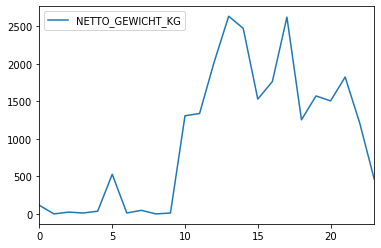

In [61]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('/Users/mac/Desktop/OrderPredictions/dfp_100017_monthly.csv')
series.plot()
pyplot.show()

In [62]:
series.head()

,FACTUUR_DATUM,NETTO_GEWICHT_KG
0,2018-01-31,114.0
1,2018-02-28,0.0
2,2018-03-31,24.0
3,2018-04-30,12.0
4,2018-05-31,36.0


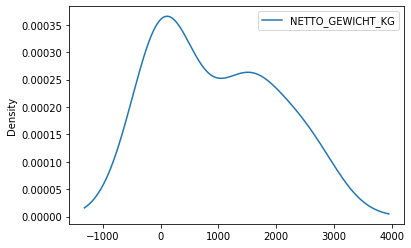

In [63]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv')
series.plot(kind='kde')
pyplot.show()

In [64]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import numpy

# monkey patch around bug in ARIMA class
def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# load data
series = read_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)
# fit model
model = ARIMA(diff, order=(0,0,1))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual
bias = 165.904728
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

In [65]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMAResults
import numpy

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

series = read_csv('dataset.csv')
months_in_year = 12
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(series.values, yhat, months_in_year)
print('Predicted: %.3f' % yhat)

Predicted: 1354.504


>Predicted=1354.504, Expected=1506
>Predicted=627.154, Expected=1824
>Predicted=2881.249, Expected=1212
>Predicted=359.454, Expected=462
RMSE: 1031.055


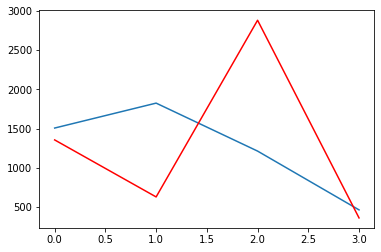

In [66]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load and prepare datasets
dataset = read_csv('dataset.csv')
X = dataset.values.astype('float32')
history = [x for x in X]
months_in_year = 12
validation = read_csv('validation.csv')
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(0,0,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = y[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()